### Proyecto IML - Weather Australian

## Parte 1: Base de datos

In [2]:
!wget -O Weather-dataset.csv 'https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/Proyecto_exploratory_FerranC/weatherAUS.csv'

--2020-04-29 17:08:43--  https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/Proyecto_exploratory_FerranC/weatherAUS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14167326 (14M) [text/plain]
Saving to: ‘Weather-dataset.csv’

Weather-dataset.csv 100%[===================>]  13.51M  29.2MB/s    in 0.5s    

2020-04-29 17:08:44 (29.2 MB/s) - ‘Weather-dataset.csv’ saved [14167326/14167326]



In [58]:
import pandas as pd
w = pd.read_csv('/content/Weather-dataset.csv',header=0,sep=',')
w.shape

(142193, 24)

In [59]:
w.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [60]:
w.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [61]:
w.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [62]:
w_nan = w.dropna()
print("Se han eliminado {} Nans y quedan {} datos".format(w.shape[0] - w_nan.shape[0],w_nan.shape[0]))

Se han eliminado 85773 Nans y quedan 56420 datos


In [0]:
#w_number = w_na.select_dtypes(include='number')
w_clean = w_nan.drop(['WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'],axis=1)

In [64]:
w_clean.shape

(56420, 12)

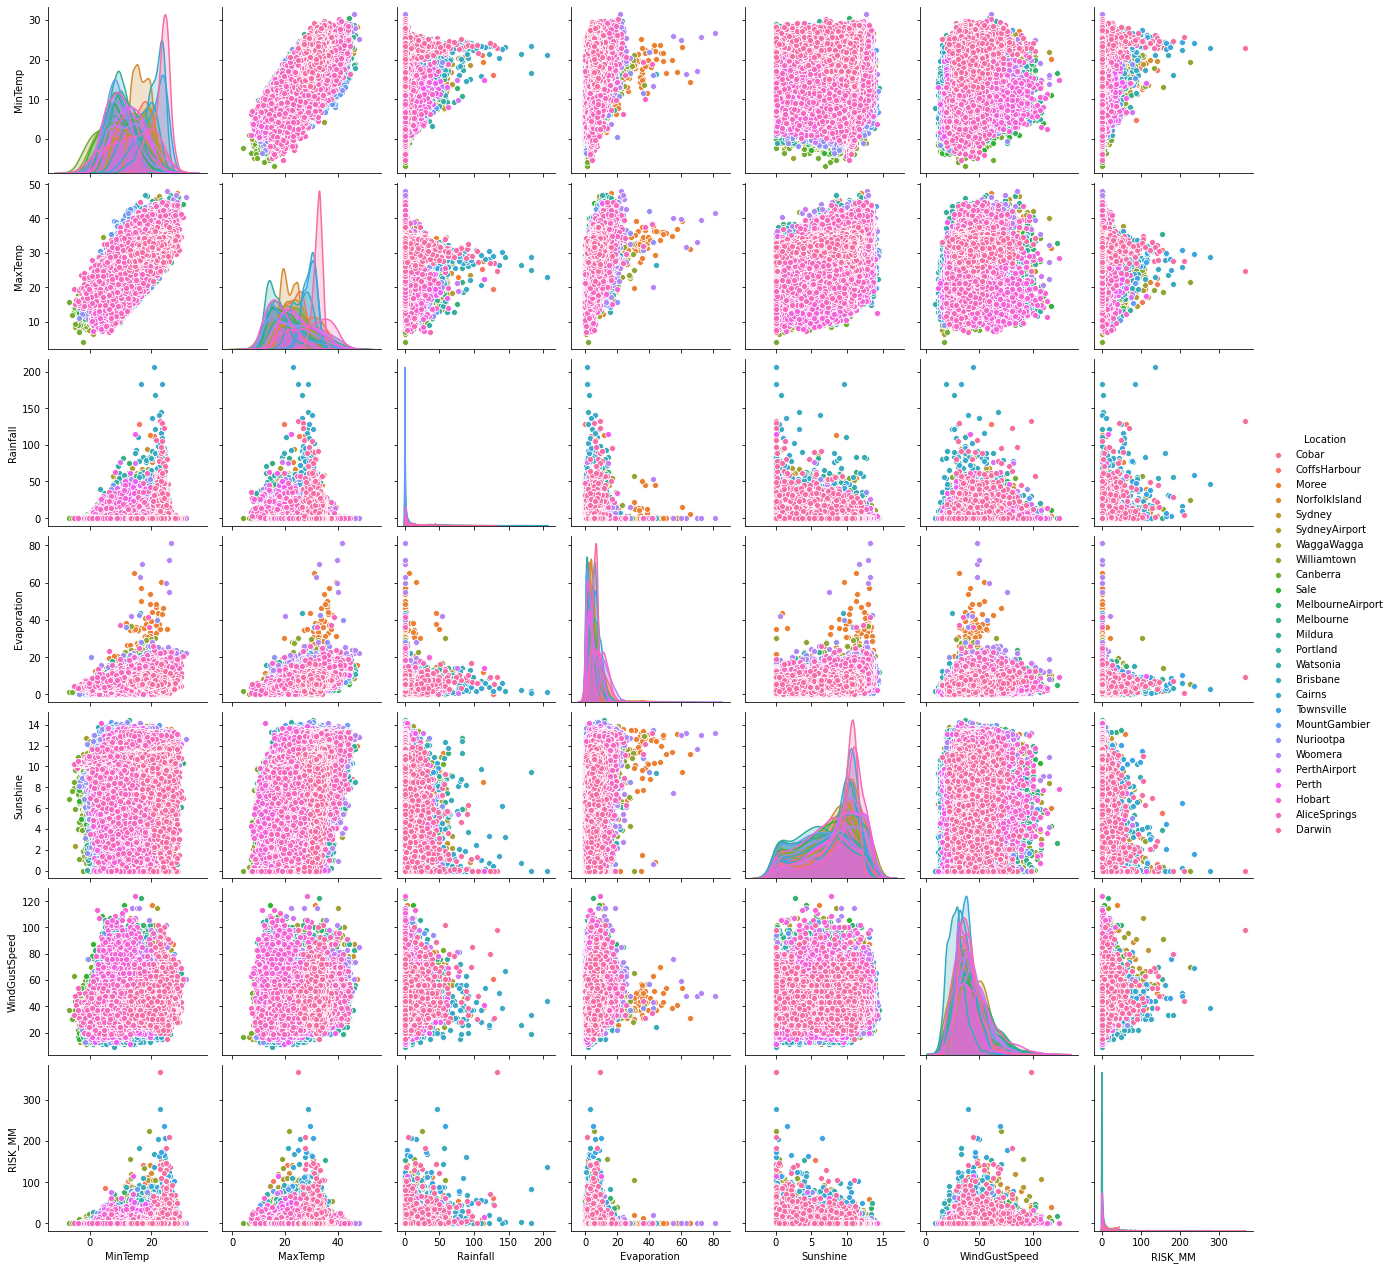

In [65]:
import seaborn as sns
pp = sns.pairplot(w_clean,hue='Location')

##Part 2: Exploración con Pandas

In [66]:
w_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,No,0.0,No


In [67]:
w_clean.groupby(by=['Location']).max()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,
AliceSprings,2016-04-26,30.3,44.9,62.0,41.8,13.4,WSW,96.0,Yes,62.0,Yes
Brisbane,2017-06-25,28.0,38.9,182.6,44.0,13.5,WSW,93.0,Yes,182.6,Yes
Cairns,2016-04-28,28.4,38.6,206.2,22.0,12.8,WSW,81.0,Yes,278.4,Yes
Canberra,2012-11-28,22.2,40.0,55.4,14.6,13.6,WSW,106.0,Yes,87.0,Yes
Cobar,2010-07-24,29.1,45.4,44.0,20.2,13.7,WSW,94.0,Yes,44.0,Yes
CoffsHarbour,2014-04-30,25.2,37.7,128.0,10.0,13.8,WSW,98.0,Yes,153.2,Yes
Darwin,2017-06-24,29.7,38.0,132.6,16.8,12.3,WSW,102.0,Yes,367.6,Yes
Hobart,2017-06-24,21.8,38.3,62.8,20.2,14.2,WSW,124.0,Yes,71.6,Yes
Melbourne,2017-06-25,28.0,46.4,82.2,20.4,13.9,WSW,104.0,Yes,45.8,Yes


In [68]:
w_clean.groupby(by=['Location']).min()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,
AliceSprings,2008-12-01,-5.2,7.0,0.0,0.0,0.0,E,19.0,No,0.0,No
Brisbane,2008-07-01,2.6,12.6,0.0,0.0,0.0,E,11.0,No,0.0,No
Cairns,2008-12-01,9.3,20.3,0.0,0.2,0.0,E,17.0,No,0.0,No
Canberra,2007-11-01,-6.7,4.1,0.0,0.0,0.0,E,11.0,No,0.0,No
Cobar,2009-01-01,0.0,9.4,0.0,0.0,0.0,E,13.0,No,0.0,No
CoffsHarbour,2009-01-01,0.6,12.9,0.0,0.0,0.0,E,15.0,No,0.0,No
Darwin,2008-07-01,12.5,21.9,0.0,0.2,0.0,E,15.0,No,0.0,No
Hobart,2008-07-01,0.3,7.2,0.0,0.0,0.0,E,15.0,No,0.0,No
Melbourne,2008-07-01,2.3,9.9,0.0,0.0,0.0,E,13.0,No,0.0,No


In [69]:
w_clean.groupby(by=['Location']).mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM
Location,,,,,,,
AliceSprings,13.878093,29.724921,0.955556,9.017994,9.539316,41.418803,0.938012
Brisbane,16.365628,26.436810,2.855401,5.444836,8.171182,28.288520,2.987403
Cairns,21.129296,29.551596,4.522259,6.030401,7.664362,38.084288,5.146727
Canberra,7.727829,20.363822,1.906957,4.329314,7.399536,40.466605,2.033488
Cobar,13.828090,26.225281,1.182397,6.648315,8.728839,36.262172,1.153184
CoffsHarbour,14.485000,23.766304,3.885942,3.882464,7.443261,39.116667,4.800000
Darwin,23.166492,32.559536,4.038210,6.318746,8.596571,40.429784,4.746048
Hobart,8.957091,17.783961,1.624033,3.632749,6.681227,47.743167,1.612171
Melbourne,11.672445,20.590253,1.912118,4.534668,6.357271,45.295047,1.557113


In [70]:
w_clean.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,367.600000


In [72]:
TempMAX = w_clean.loc[w_clean['MaxTemp']>= w_clean['MaxTemp'].mean()]
TempMAX['Location']

5939       Cobar
5940       Cobar
5942       Cobar
5943       Cobar
5944       Cobar
           ...  
139108    Darwin
139109    Darwin
139110    Darwin
139111    Darwin
139112    Darwin
Name: Location, Length: 27313, dtype: object